# Neural Nets

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=LwM7xabuiIc&t=1948s

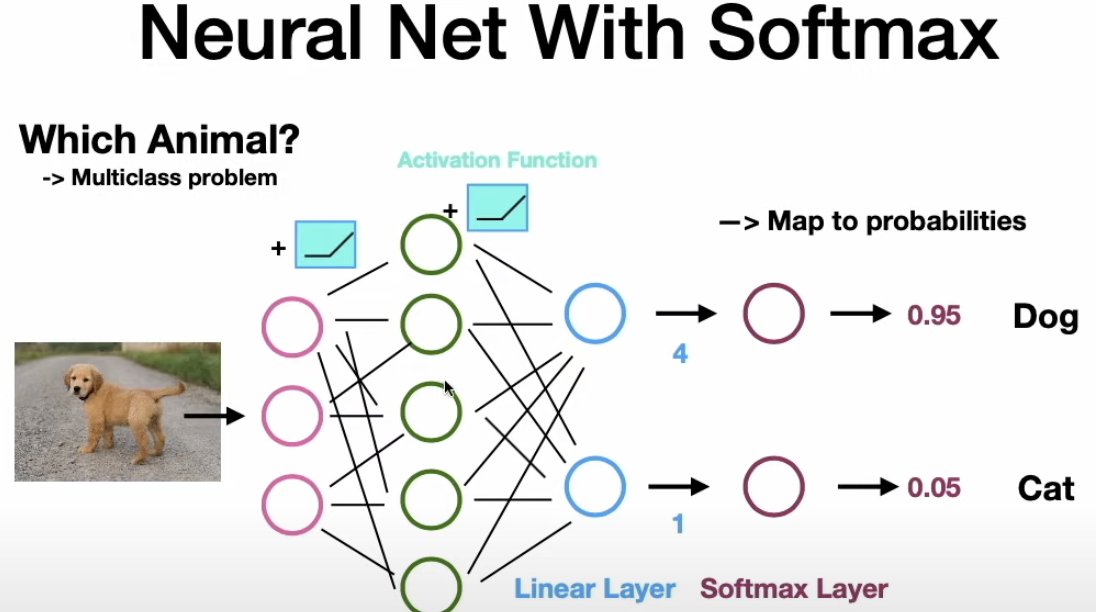

In [2]:
from IPython.display import Image, display

display(Image(filename='images/neural_net_1.png', width=800))


We will implement a neural network that will look like one above. Our neural network has multiple layers and it gets input image and then i processes this image and at the end it produces a probability for each class. So we have a multi-class classification problem here. This means that at the end we use a softmax layer to get the probabilities.

Tensorflow provides tw odifferent kind of apis. The Keras sequential api and the subclassing api. The Keras api abstracts away a lot of things and makes implementing the algorithms much easier. Tensorfloew creators say that this one is for beginners and the subclassing api is for experts. Patric doesn't think this is a good description becauser Keras is not good just for beginners but it's also a good fit for experienced programmers. Keras is a great api and we can implement a lot of things and then only when we need moire flexibility we can/ should swithc over the subclass api.

## Code

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.mnist

# we have to use 2 tuples, because that's what load data returns
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}, shape of y_train: {y_train.shape}")

11490434/11490434 [==============================] - 4s 0us/step
Shape of x_train: (60000, 28, 28), shape of y_train: (60000,)


In [6]:
# normalize the data because right nowthe images have values between 0 and 255 and we want to have values between 0 and 1
x_train, x_test = x_train / 255, x_test / 255

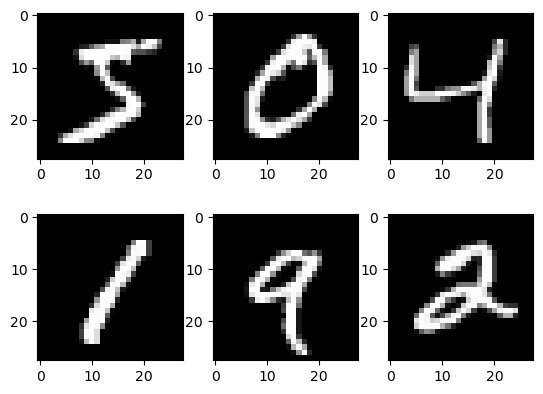

In [7]:
# plot the data
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [8]:
# model
model = keras.models.Sequential([
    # flattens our image to be reduce to one dimension, we don't have to specify the input_shape
    keras.layers.Flatten(input_shape=(28,28)),
    # first real layer fully conected layer
    keras.layers.Dense(128, activation='relu'), # we can play with the size of this layer
    # final layer, 10 classes
    keras.layers.Dense(10)
    # we could implement Softmax here, but in tf docs they say that this is not reecomended
    # and we should implement it in our loss function later
    #keras.layers.Sofrmax()
])

In [9]:
# if we don't specify the input_shape we can print summary only after we compile our model. it is a good practice to include here the input shape
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
